In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

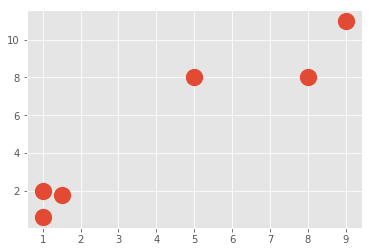

In [2]:
X = np.array([[1,2],
                     [1.5, 1.8],
                     [5, 8],
                     [8, 8],
                     [1, 0.6],
                     [9, 11]])
plt.scatter(X[:, 0], X[:, 1], s=150, linewidths=5, zorder=10)
plt.show()

In [4]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
centroids = clf.cluster_centers_
labels  = clf.labels_
centroids, labels

(array([[1.16666667, 1.46666667],
        [7.33333333, 9.        ]]), array([0, 0, 1, 1, 0, 1], dtype=int32))

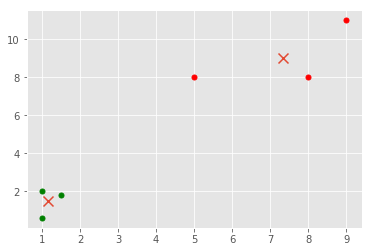

In [8]:
colors = ["g.", "r.", "c.", "y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=100, linewidths=5, zorder=10)
plt.show()

In [12]:
from sklearn import preprocessing, cross_validation
import pandas as pd

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
df = pd.read_excel('titanic.xls')
df.drop(['body', 'name'], 1, inplace=True)
print(df.head(10))

   pclass  survived     sex      age  sibsp  parch    ticket      fare  \
0       1         1  female  29.0000      0      0     24160  211.3375   
1       1         1    male   0.9167      1      2    113781  151.5500   
2       1         0  female   2.0000      1      2    113781  151.5500   
3       1         0    male  30.0000      1      2    113781  151.5500   
4       1         0  female  25.0000      1      2    113781  151.5500   
5       1         1    male  48.0000      0      0     19952   26.5500   
6       1         1  female  63.0000      1      0     13502   77.9583   
7       1         0    male  39.0000      0      0    112050    0.0000   
8       1         1  female  53.0000      2      0     11769   51.4792   
9       1         0    male  71.0000      0      0  PC 17609   49.5042   

     cabin embarked boat                        home.dest  
0       B5        S    2                     St Louis, MO  
1  C22 C26        S   11  Montreal, PQ / Chesterville, ON  
2  C2

In [39]:
#df.apply(pd.to_numeric)
print(df.head(10))
df.fillna(0, inplace=True)

   pclass  survived     sex      age  sibsp  parch    ticket      fare  \
0       1         1  female  29.0000      0      0     24160  211.3375   
1       1         1    male   0.9167      1      2    113781  151.5500   
2       1         0  female   2.0000      1      2    113781  151.5500   
3       1         0    male  30.0000      1      2    113781  151.5500   
4       1         0  female  25.0000      1      2    113781  151.5500   
5       1         1    male  48.0000      0      0     19952   26.5500   
6       1         1  female  63.0000      1      0     13502   77.9583   
7       1         0    male  39.0000      0      0    112050    0.0000   
8       1         1  female  53.0000      2      0     11769   51.4792   
9       1         0    male  71.0000      0      0  PC 17609   49.5042   

     cabin embarked boat                        home.dest  
0       B5        S    2                     St Louis, MO  
1  C22 C26        S   11  Montreal, PQ / Chesterville, ON  
2  C2

In [42]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        pd.to_numeric(df[column])
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [43]:
df = handle_non_numerical_data(df)
print(df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     712  211.3375    159   
1       1         1    1   0.9167      1      2     481  151.5500     53   
2       1         0    0   2.0000      1      2     481  151.5500     53   
3       1         0    1  30.0000      1      2     481  151.5500     53   
4       1         0    0  25.0000      1      2     481  151.5500     53   

   embarked  boat  home.dest  
0         3     1        330  
1         3    20        170  
2         3     0        170  
3         3     0        170  
4         3     0        170  


In [45]:
X = np.array(df.drop(['survived'], 1).astype(float))
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))

0.4820473644003056


In [73]:
X = np.array(df.drop(['survived', 'cabin', 'home.dest'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.7899159663865546


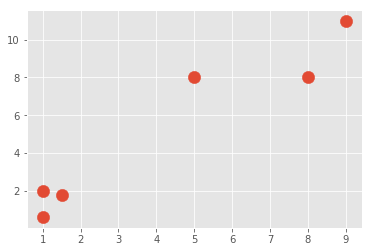

In [75]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
                     [1.5, 1.8],
                     [5, 8],
                     [8, 8],
                     [1, 0.6],
                     [9, 11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [76]:
colors = 10*["g", "r", "c", "b", "k"]
print(colors)

['g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k', 'g', 'r', 'c', 'b', 'k']


In [83]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                print(np.sum((current_centroid-original_centroid)/original_centroid*100.0), self.tol)
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
                
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [84]:
clf = K_Means()
clf.fit(X)

0.0 0.001
453.3333333333334 0.001
-9.999999999999996 0.001
102.72108843537411 0.001
0.0 0.001
0.0 0.001


In [86]:
clf.centroids, clf.classifications

({0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])},
 {0: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])],
  1: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]})

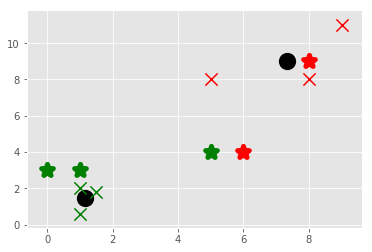

In [89]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

unknowns = np.array([[1,3],
                                    [8,9],
                                    [0,3],
                                    [5,4],
                                    [6,4]])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidth=5)
    
plt.show()

In [121]:
X = np.array(df.drop(['survived', 'ticket', 'home.dest'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2)

In [122]:
clf = K_Means()
clf.fit(X_train)

-814.7772946231137 0.001
-725.4358626033653 0.001


In [123]:
correct = 0
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y_test[i]:
        correct += 1
        
print(correct/len(X_test))

0.1183206106870229


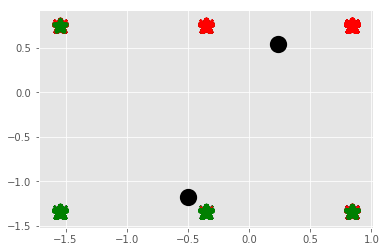

In [124]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

unknowns = X_test

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidth=5)
    
plt.show()